In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define thresholds
speed_threshold = 30  # Average speed in km/h below which is considered congested
threshold = 100  # Vehicle count per hour indicating high traffic volume


df = pd.read_excel("Combined_Data_Hourly.xlsx")


# Quick check of the loaded data
print(df.head())

               hour       Date           Time  vehicle_count_per_hour  \
0  08/01/2023 00:00 2023-08-01  00:00 - 01:00                      78   
1  08/01/2023 01:00 2023-08-01  01:00 - 02:00                      54   
2  08/01/2023 02:00 2023-08-01  02:00 - 03:00                      44   
3  08/01/2023 03:00 2023-08-01  03:00 - 04:00                      42   
4  08/01/2023 04:00 2023-08-01  04:00 - 05:00                      56   

   average_speed_per_hour     PH  PH Bool         day  datetime  \
0                    77.0  False        0  2023-08-01  00:00:00   
1                    85.0  False        0  2023-08-01  01:00:00   
2                    82.0  False        0  2023-08-01  02:00:00   
3                    79.0  False        0  2023-08-01  03:00:00   
4                    82.0  False        0  2023-08-01  04:00:00   

   datetimeEpoch  ...  pressure  visibility  cloudcover  solarradiation  \
0     1690840800  ...    1010.9        16.6         0.0             NaN   
1     16

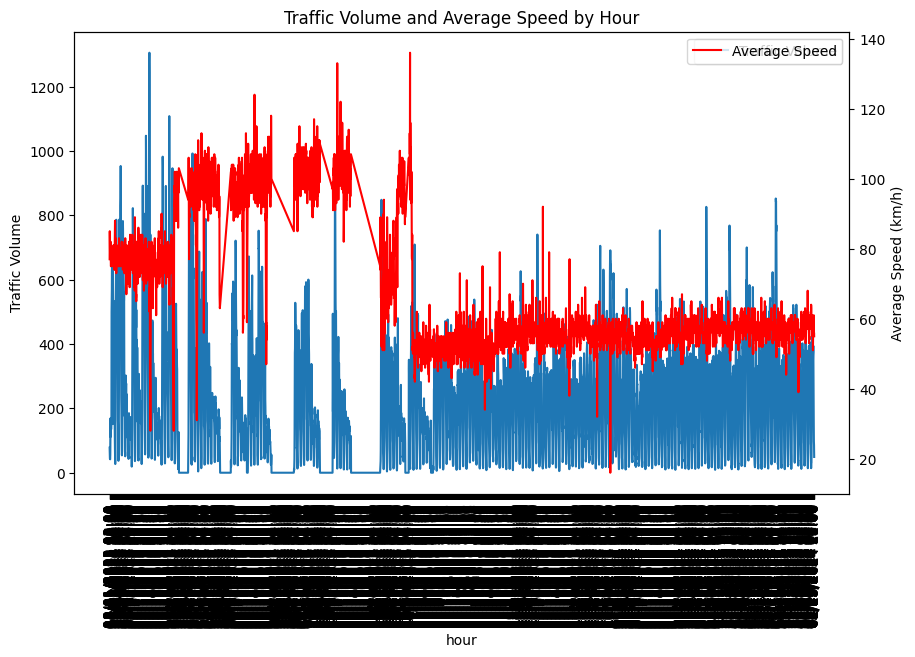

In [28]:
# Assuming you have a DataFrame 'df' with columns 'vehicle_count_per_hour' and 'average_speed_per_hour'

# Calculate simple metrics or categorizations based on volume and speed
df['congestion_level'] = np.where((df['vehicle_count_per_hour'] > threshold) & (df['average_speed_per_hour'] < speed_threshold), 'High Congestion', 'Normal/Free Flow')

# Explore correlations
correlation = df[['vehicle_count_per_hour', 'average_speed_per_hour']].corr()

# Visualize trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='vehicle_count_per_hour', label='Traffic Volume')
# Here's where you adjust the hour labels to be vertical
plt.xticks(rotation=90) # Rotates x-axis labels to vertical

plt.ylabel('Traffic Volume')
plt.twinx()
sns.lineplot(data=df, x='hour', y='average_speed_per_hour', label='Average Speed', color='r')
plt.ylabel('Average Speed (km/h)')
plt.title('Traffic Volume and Average Speed by Hour')
plt.legend()
plt.show()

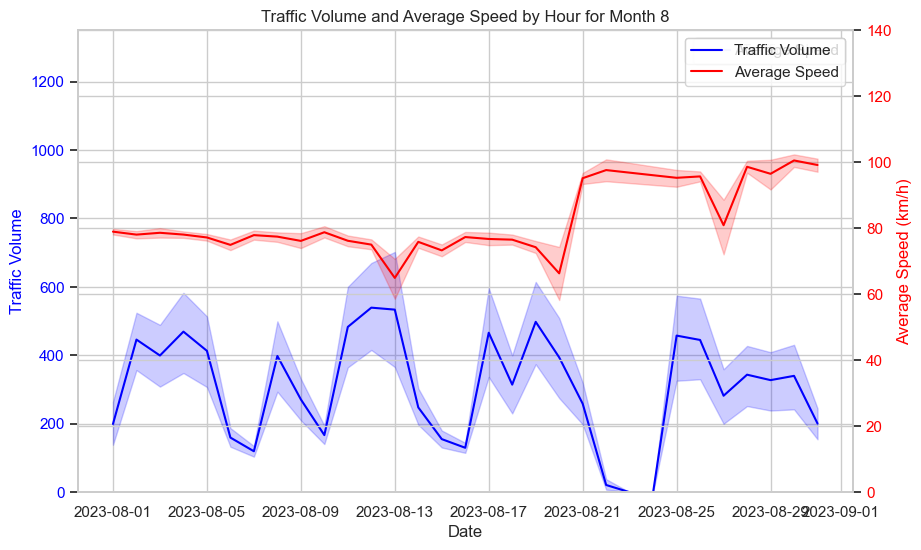

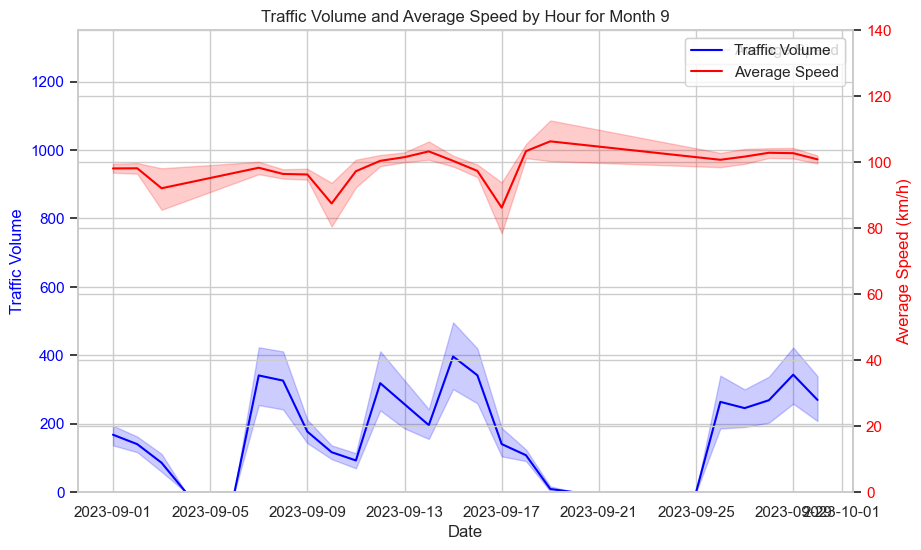

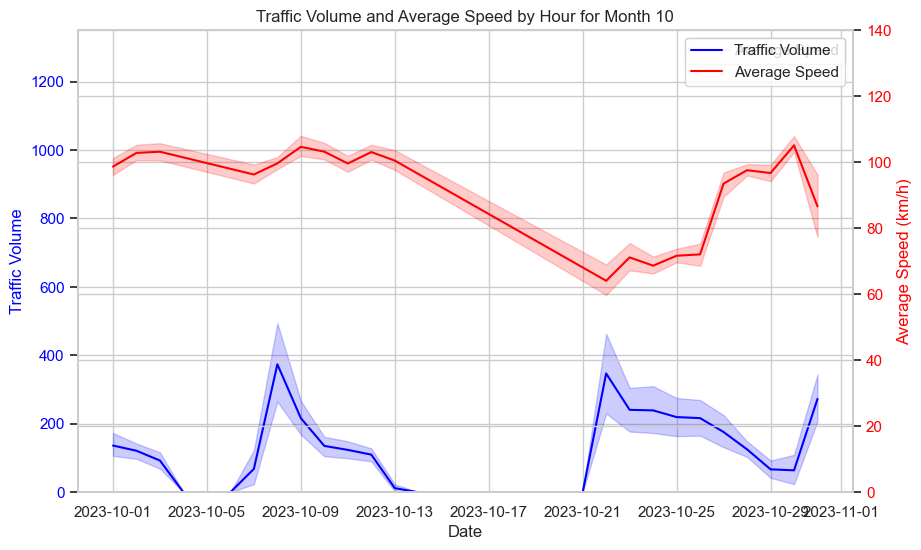

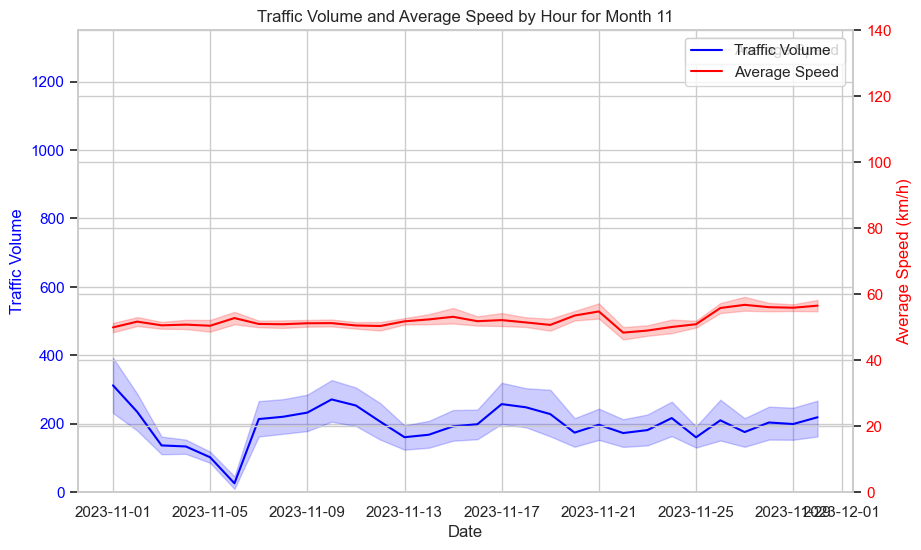

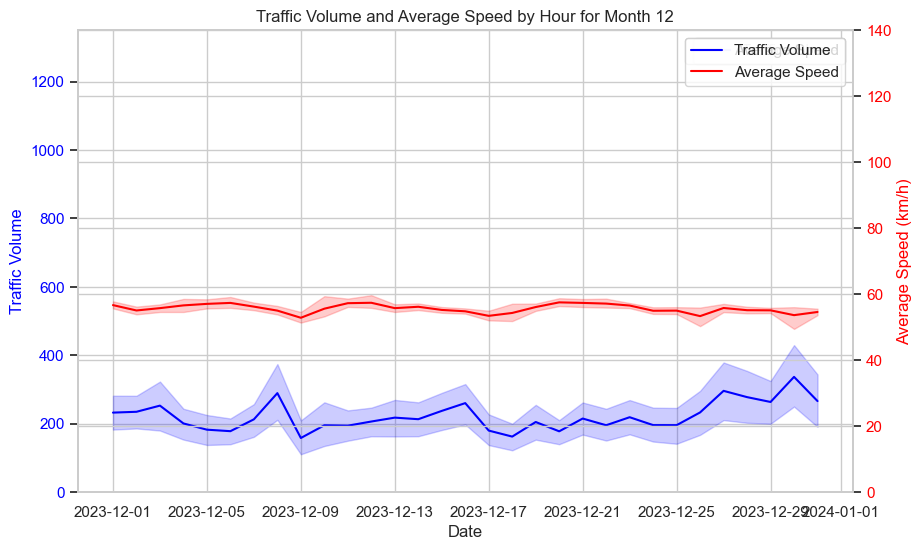

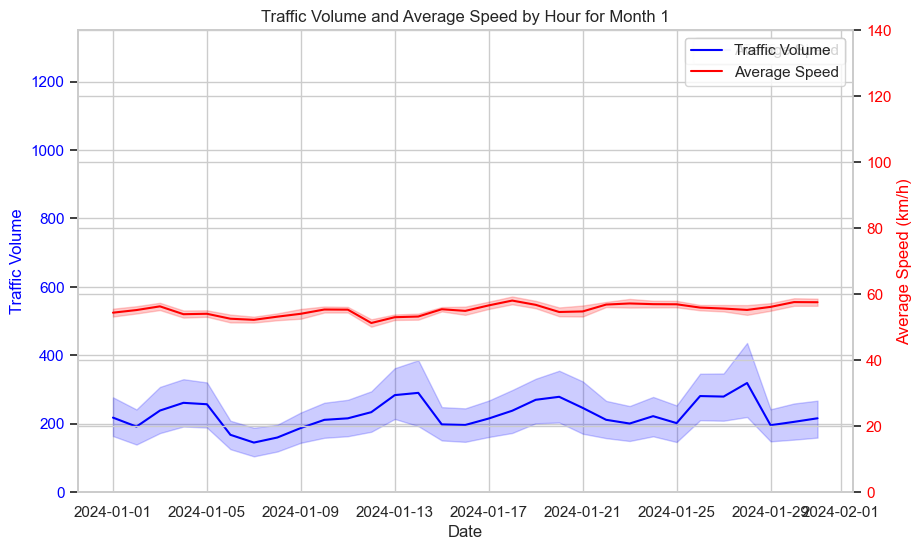

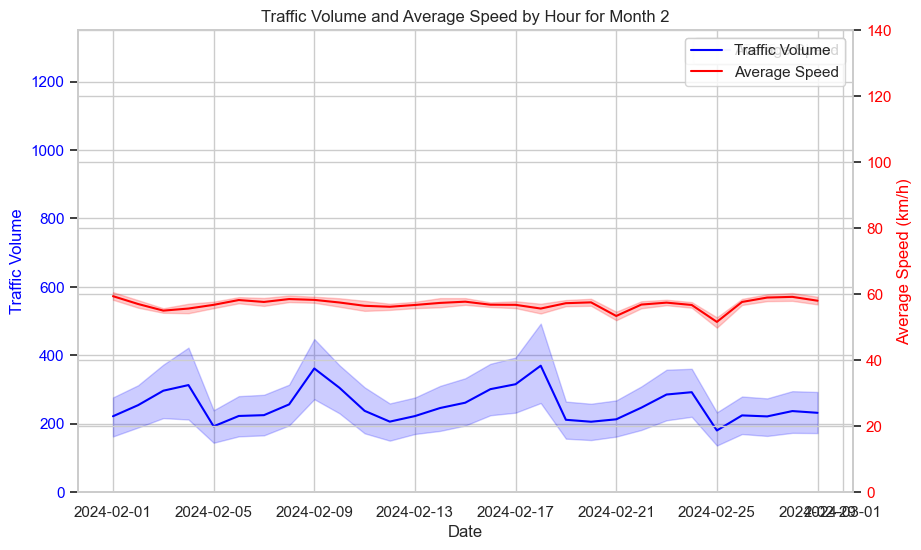

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your DataFrame here
# df = pd.read_excel('your_data.xlsx')

# Convert 'date' to datetime and extract the month if not already done
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Set the global aesthetics for the plots
sns.set(style="whitegrid")

# Define the y-axis limits for traffic volume and average speed
volume_ylim = (0, 1350)
speed_ylim = (0, 140)

# Create a plot for each month
for month in df['Month'].unique():
    monthly_data = df[df['Month'] == month]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot traffic volume
    sns.lineplot(data=monthly_data, x='Date', y='vehicle_count_per_hour', label='Traffic Volume', ax=ax1, color='blue')
    ax1.set_ylim(volume_ylim)
    ax1.set_ylabel('Traffic Volume', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis for average speed
    ax2 = ax1.twinx()
    sns.lineplot(data=monthly_data, x='Date', y='average_speed_per_hour', label='Average Speed', ax=ax2, color='red')
    ax2.set_ylim(speed_ylim)
    ax2.set_ylabel('Average Speed (km/h)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Set the title and show the plot
    plt.title(f'Traffic Volume and Average Speed by Hour for Month {month}')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.show()


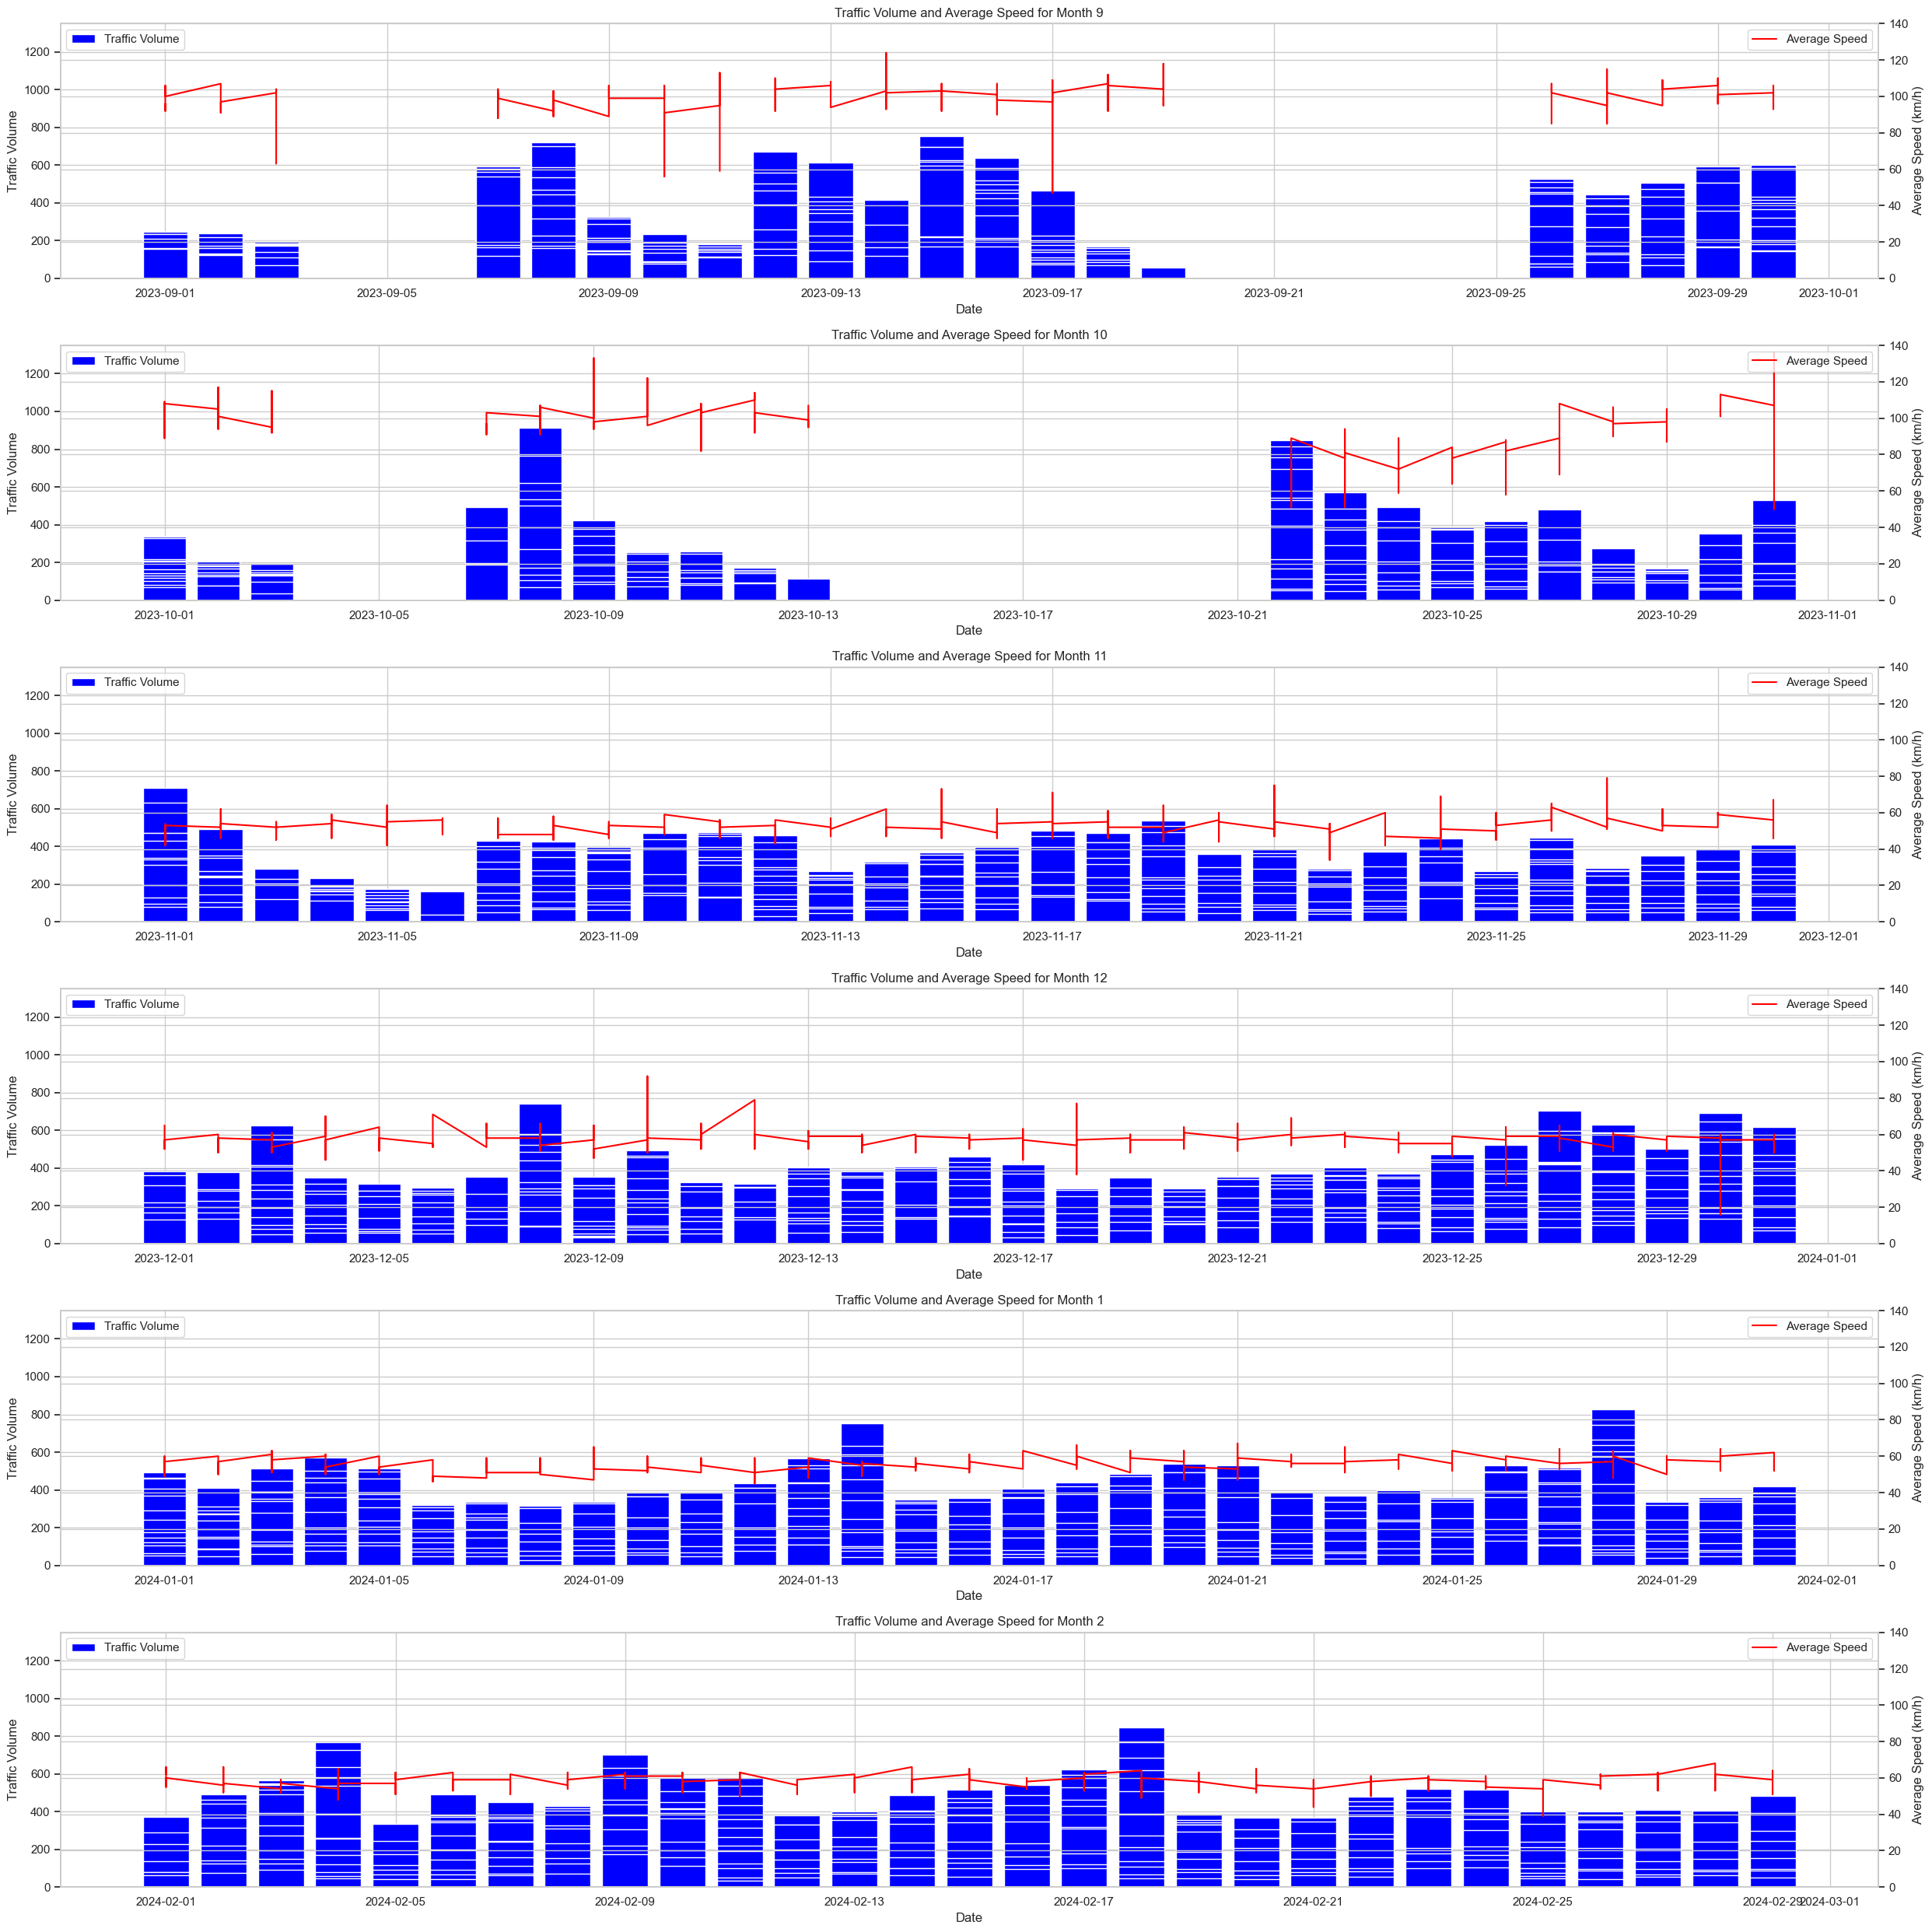

In [45]:
# Set the figure size for the subplots
plt.figure(figsize=(25, 25))

# Define Y-axis limits
traffic_volume_limits = (0, 1350)
average_speed_limits = (0, 140)

# Specify the months to plot
months_to_plot = [9, 10, 11, 12, 1, 2]
num_plots = len(months_to_plot)

# Loop through the specified months and create a plot for each
for i, month in enumerate(months_to_plot, 1):
    ax1 = plt.subplot(num_plots, 1, i)
    # Filter data for the specific month
    month_data = df[df['Month'] == month]
    
    # Plot Traffic Volume
    ax1.bar(month_data['Date'], month_data['vehicle_count_per_hour'], color='blue', label='Traffic Volume')
    ax1.set_ylim(traffic_volume_limits)
    
    # Create a twin axis for Average Speed
    ax2 = ax1.twinx()
    ax2.plot(month_data['Date'], month_data['average_speed_per_hour'], color='red', label='Average Speed')
    ax2.set_ylim(average_speed_limits)
    
    # Set titles and labels
    ax1.set_title(f'Traffic Volume and Average Speed for Month {month}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Traffic Volume')
    ax2.set_ylabel('Average Speed (km/h)')
    
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Handling of missing Data

In [65]:
#INTERPOLATION DOES NOT MAKE SENSE IN THIS CASE
import pandas as pd
import numpy as np


# Load your data (this is just an example, replace with your actual data loading code)
df = pd.read_csv('Handling_Missing_Data_Done.csv', encoding='ISO-8859-1')
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Assuming 'df' is your DataFrame and you've already loaded it

# Replace empty strings or other placeholders with NaN
df['vehicle_count_per_hour'].replace('', np.nan, inplace=True)

# Convert column to numeric, forcing non-numeric values to be NaN
df['vehicle_count_per_hour'] = pd.to_numeric(df['vehicle_count_per_hour'], errors='coerce')

# Now you can apply interpolation to fill in these NaNs
df['vehicle_count_per_hour'] = df['vehicle_count_per_hour'].interpolate(method='linear')

# After interpolation, you can fill any remaining NaNs at the beginning or end of the series
df['vehicle_count_per_hour'].bfill(inplace=True)  # Backward fill
df['vehicle_count_per_hour'].ffill(inplace=True)  # Forward fill

# Save the DataFrame to a new Excel file
df.to_excel('Updated_Data.xlsx', index=False)

# Or, if you want to overwrite the existing file (be cautious with this approach)
df.to_excel('Handling_Missing_Data_Done.xlsx', index=False)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'DateTime' is the datetime column
# Ensure 'DateTime' is set as the index
df.set_index('DateTime', inplace=True)

# Make sure to sort the DataFrame by datetime just in case
df.sort_index(inplace=True)

# Replace zeros with NaN to indicate missing values if zero means missing data
df['vehicle_count_per_hour'].replace(0, pd.NA, inplace=True)

# Let's assume you want to use the historical average of the same weekday and hour.
# You can group by the hour and weekday to calculate the historical average
historical_avg = df.groupby([df.index.weekday, df.index.hour])['vehicle_count_per_hour'].transform('mean')

# Fill missing values with the historical average
df['vehicle_count_per_hour'] = df['vehicle_count_per_hour'].fillna(historical_avg)

# Save the DataFrame to a new Excel file
df.to_excel('Updated_Data.xlsx', index=False)